AENA METODO ARIMA

In [1]:
pip install pandas numpy matplotlib seaborn statsmodels pmdarima


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Paso 1: Cargar y preparar los datos**




In [2]:
df = pd.read_csv("/content/IBEX35_cotizaciones_20_Limpio.csv", sep=",")
df

,Fecha,Empresa,Precio_cierre
0,NaN,NaN,NaN
1,2005-04-01,ACCIONA,36.337158
2,2005-04-04,ACCIONA,35.794037
3,2005-04-05,ACCIONA,36.233715
4,2005-04-06,ACCIONA,36.388882
...,...,...,...
151101,2025-03-26,UNICAJA BANCO,1.774000
151102,2025-03-27,UNICAJA BANCO,1.749000
151103,2025-03-28,UNICAJA BANCO,1.710000
151104,2025-03-31,UNICAJA BANCO,1.706000


In [3]:
df_aena = df[df["Empresa"] == "AENA"]

In [4]:
df_aena.to_csv('df_aena.csv', index=False)

In [5]:
df_aena['Fecha'] = pd.to_datetime(df_aena['Fecha'], errors='coerce')


<ipython-input-5-6e430c4e09bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aena['Fecha'] = pd.to_datetime(df_aena['Fecha'], errors='coerce')


In [6]:
#Seleccionar solo las columnas necesarias y establecer el índice
df_aena = df_aena[['Fecha', 'Precio_cierre']].set_index('Fecha')

In [7]:
df_aena.isnull().sum()

,0
Precio_cierre,0


In [8]:
df_aena

,Precio_cierre
Fecha,
2015-02-11,54.628952
2015-02-12,54.628952
2015-02-13,57.750599
2015-02-16,56.579987
2015-02-17,58.452972
...,...
2025-03-26,218.800003
2025-03-27,219.199997
2025-03-28,219.800003


**Paso 2: Visualizar la serie temporal**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

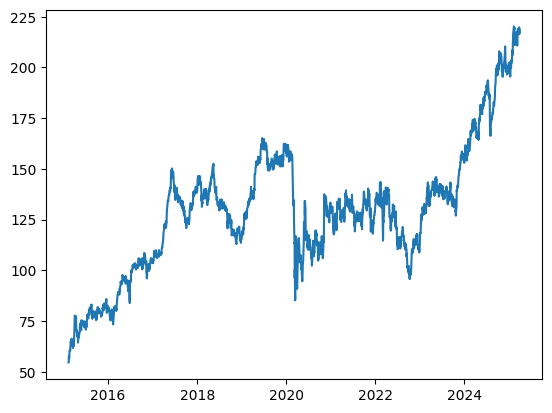

In [10]:
plt.plot(df_aena)

**PASO 3: Descomposición de la serie para ver estacionalidad**

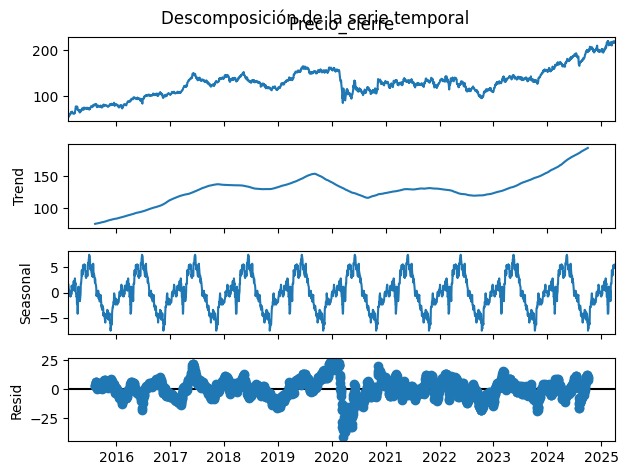

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición aditiva con frecuencia anual (252 días hábiles)
decomposicion = seasonal_decompose(df_aena['Precio_cierre'], model='additive', period=252)

# Mostrar los componentes
decomposicion.plot()
plt.suptitle('Descomposición de la serie temporal')
plt.show()


**Paso 3: Comprobar si es estacionaria (ADF test)**

In [12]:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(df_aena["Precio_cierre"])
print("ADF Statistic:", resultado[0])
print("p-value:", resultado[1])


ADF Statistic: -0.8837966092223365
p-value: 0.7932615847037618


p-valor > 0.05 -> la serie NO es estacionaria -> necesita diferenciacion

**Paso 4: Diferenciación**

In [13]:
# NO sobrescribas la columna original
df_aena["Close_diff"] = df_aena["Precio_cierre"].diff()

# ADF sobre la serie diferenciada (sin nulos)
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_aena["Close_diff"].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -13.071335020452286
p-value: 1.9542449777956427e-24


In [14]:
df_aena.dropna(inplace=True)

In [15]:
df_aena

,Precio_cierre,Close_diff
Fecha,,
2015-02-12,54.628952,0.000000
2015-02-13,57.750599,3.121647
2015-02-16,56.579987,-1.170612
2015-02-17,58.452972,1.872986
2015-02-18,59.990395,1.537422
...,...,...
2025-03-26,218.800003,0.000000
2025-03-27,219.199997,0.399994
2025-03-28,219.800003,0.600006


**PASO 6: Identificar parametros**

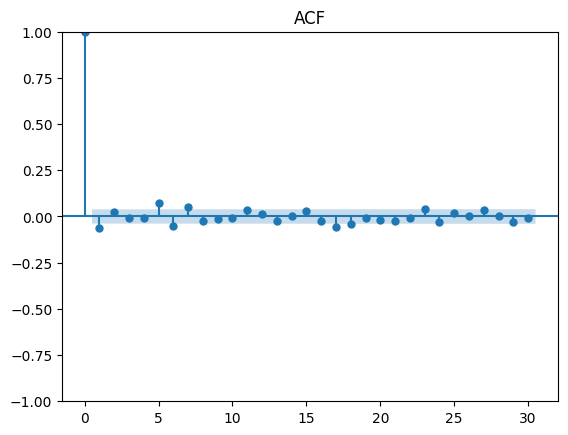

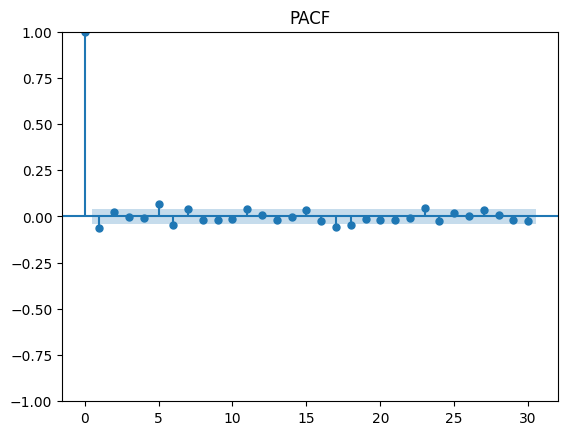

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF (para q)
plot_acf(df_aena['Close_diff'].dropna(), lags=30)
plt.title("ACF")
plt.show()

# PACF (para p)
plot_pacf(df_aena['Close_diff'].dropna(), lags=30)
plt.title("PACF")
plt.show()


**PASO 7: AJUSTAR SARIMA**

In [17]:
# Fecha de corte
fecha_corte = '2022-04-01'

train = df_aena.loc[:fecha_corte]['Precio_cierre']
test = df_aena.loc[fecha_corte:]['Precio_cierre']


In [2]:
!pip install numpy==1.23.5
!pip install pmdarima --force-reinstall --no-cache-dir


  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.2

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


In [22]:
from pmdarima import auto_arima

modelo_auto = auto_arima(train,
                         seasonal=True,
                         m=5,  # frecuencia semanal laboral (ajustable)
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=7865.397, Time=7.75 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=7893.852, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=7875.604, Time=1.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=7875.362, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=7892.686, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=7880.635, Time=1.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=7881.067, Time=1.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[5] intercept   : AIC=7880.346, Time=7.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[5] intercept   : AIC=7880.519, Time=8.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=7868.910, Time=3.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=7882.264, Time=5.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[5] intercept   : AIC=7882.669, Time=1.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[5] intercept   : AIC=7881.550, Time=5.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[5] intercept   : AIC=7878.024, Time=4.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[5] intercept   : AIC=7878.036, Time=2.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[5] intercept   : AIC=7881.991, Time=3.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[5] intercept   : AIC=7867.178, Time=9.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[5] intercept   : AIC=7876.179, Time=3.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,1)[5] intercept   : AIC=7875.424, Time=7.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,1)[5] intercept   : AIC=7880.032, Time=2.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[5] intercept   : AIC=7871.135, Time=10.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[5]             : AIC=7878.855, Time=1.34 sec

Best model:  ARIMA(2,1,2)(1,0,1)[5] intercept
Total fit time: 92.530 seconds


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo = SARIMAX(train,
                 order=modelo_auto.order,
                 seasonal_order=modelo_auto.seasonal_order,
                 enforce_stationarity=False,
                 enforce_invertibility=False)

modelo_fit = modelo.fit()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


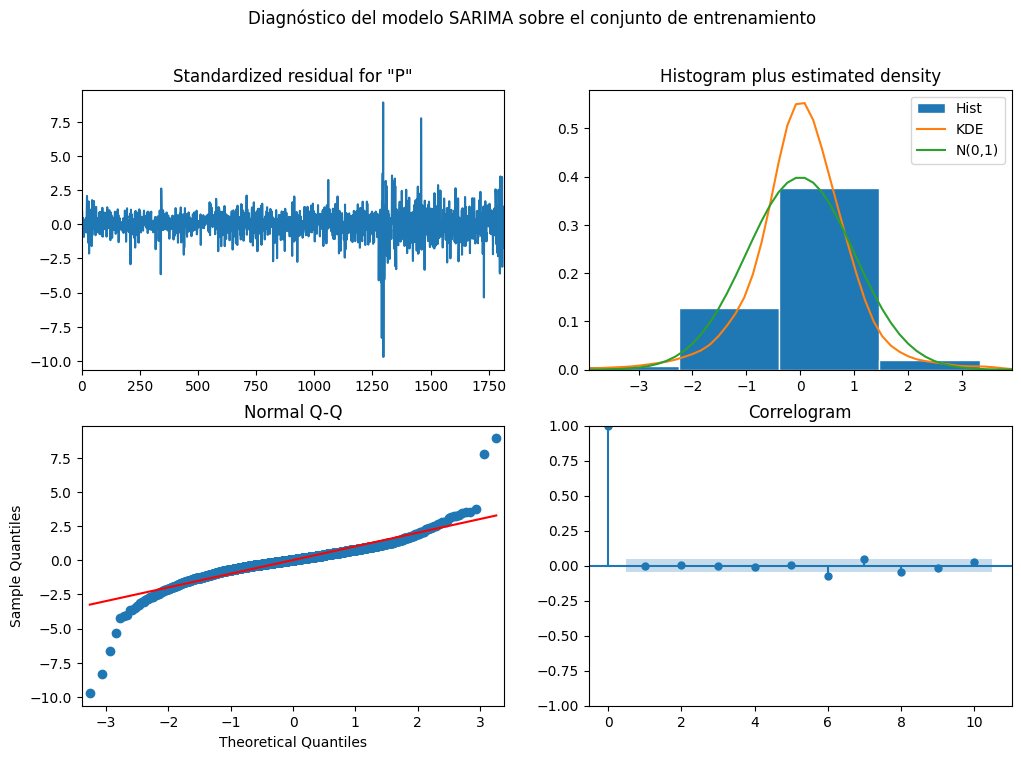

In [24]:
modelo_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle('Diagnóstico del modelo SARIMA sobre el conjunto de entrenamiento')
plt.show()


In [25]:
# Número de pasos a predecir
n_periods = len(test)

# Predecir
forecast = modelo_fit.forecast(steps=n_periods)

# Alinear índices
forecast.index = test.index


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")


RMSE: 36.8436


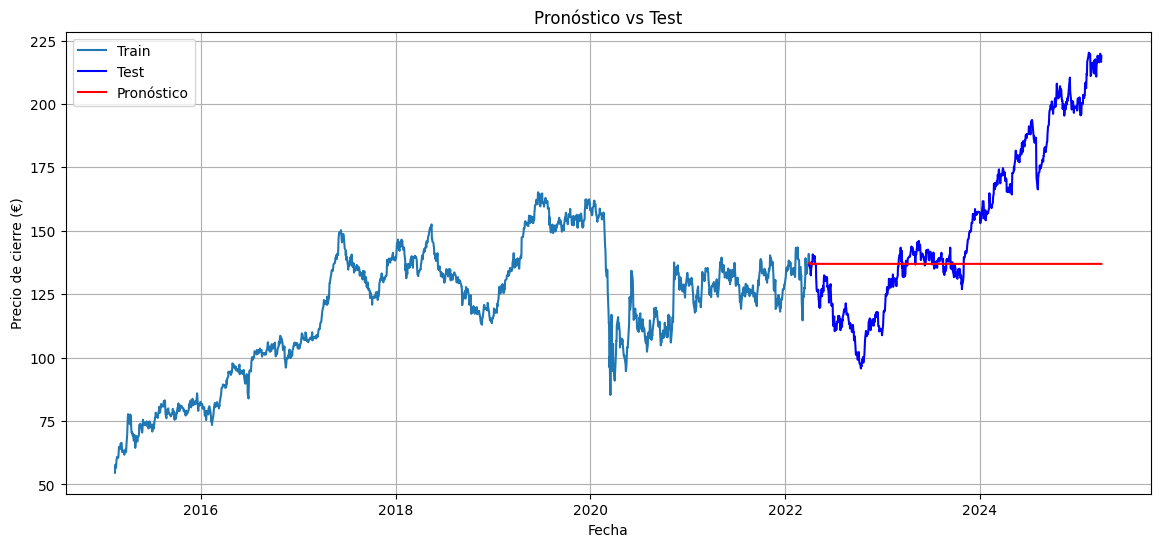

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Pronóstico vs Test')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (€)')
plt.legend()
plt.grid(True)
plt.show()


INCLUIR T DE TENDENCIA PARA QUE NO SEA UNA LINEA RECTA

In [28]:
from pmdarima import auto_arima

modelo_auto = auto_arima(train,
                         seasonal=False,  # sin SARIMA
                         trend='t',       # incluye tendencia
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7902.630, Time=3.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7894.577, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7889.276, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7889.601, Time=0.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7894.577, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7890.440, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7890.817, Time=0.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7892.443, Time=0.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7889.276, Time=0.38 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 8.009 seconds


In [29]:
# 2. Ajuste SARIMAX con tendencia explícita
modelo = SARIMAX(train,
                 order=modelo_auto.order,
                 trend='t',  # ← incluye la tendencia lineal
                 enforce_stationarity=False,
                 enforce_invertibility=False)
modelo_fit = modelo.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


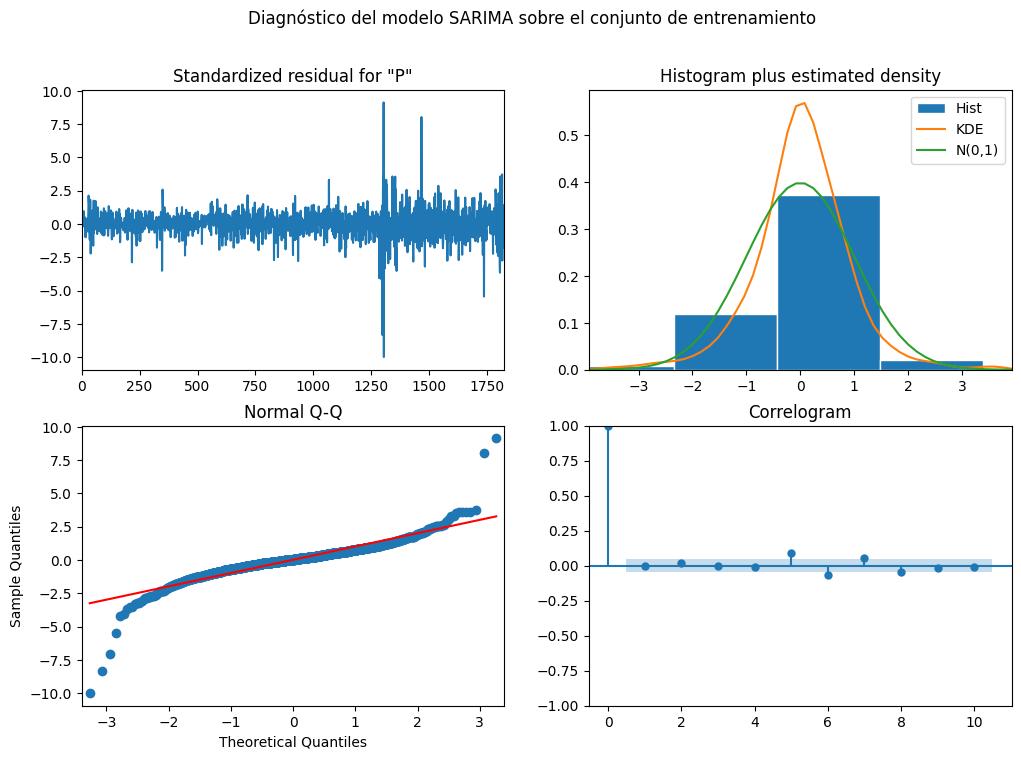

In [30]:
modelo_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle('Diagnóstico del modelo SARIMA sobre el conjunto de entrenamiento')
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


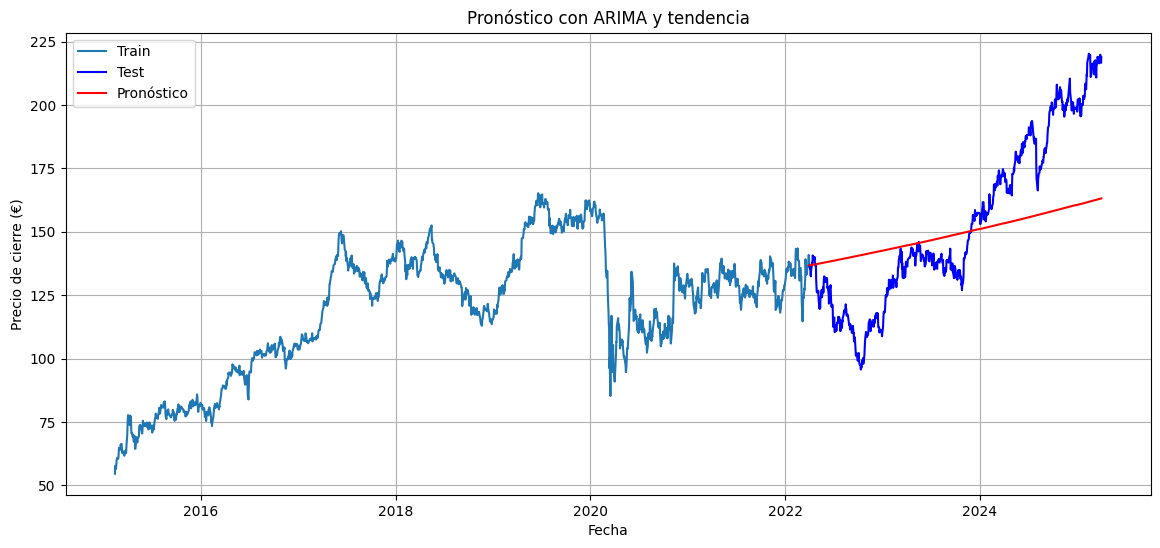

In [31]:
# 3. Forecast alineado al test
forecast = modelo_fit.forecast(steps=len(test))
forecast.index = test.index

plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Pronóstico con ARIMA y tendencia')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (€)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Asegúrate de alinear los índices (ya lo hiciste)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")


RMSE: 26.2863


PRUEBA CON ESTACIONALIDAD MES BURSATIL

In [33]:
from pmdarima import auto_arima
modelo_auto = auto_arima(train,
                         seasonal=True,
                         m=21,
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[21] intercept   : AIC=inf, Time=26.00 sec
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=7893.852, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=7889.662, Time=1.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=7889.879, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=7892.686, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[21] intercept   : AIC=7888.455, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[21] intercept   : AIC=7889.556, Time=1.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[21] intercept   : AIC=inf, Time=7.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[21] intercept   : AIC=7889.653, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[21] intercept   : AIC=7889.837, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[21] intercept   : AIC=7888.777, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[21] intercept   : AIC=7891.651, Time=1.03 sec
 ARIMA(1,1,0)(0,0,0)[21]             : AIC=7887.403, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[21]             : AIC=7888.643, Time=0.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[21]             : AIC=7888.542, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[21]             : AIC=inf, Time=2.31 sec
 ARIMA(2,1,0)(0,0,0)[21]             : AIC=7888.559, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[21]             : AIC=7888.764, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[21]             : AIC=7887.727, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[21]             : AIC=7890.561, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,0,0)[21]          
Total fit time: 45.070 seconds


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo = SARIMAX(train,
                 order=modelo_auto.order,
                 seasonal_order=modelo_auto.seasonal_order,
                 trend='t',
                 enforce_stationarity=False,
                 enforce_invertibility=False)

modelo_fit = modelo.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


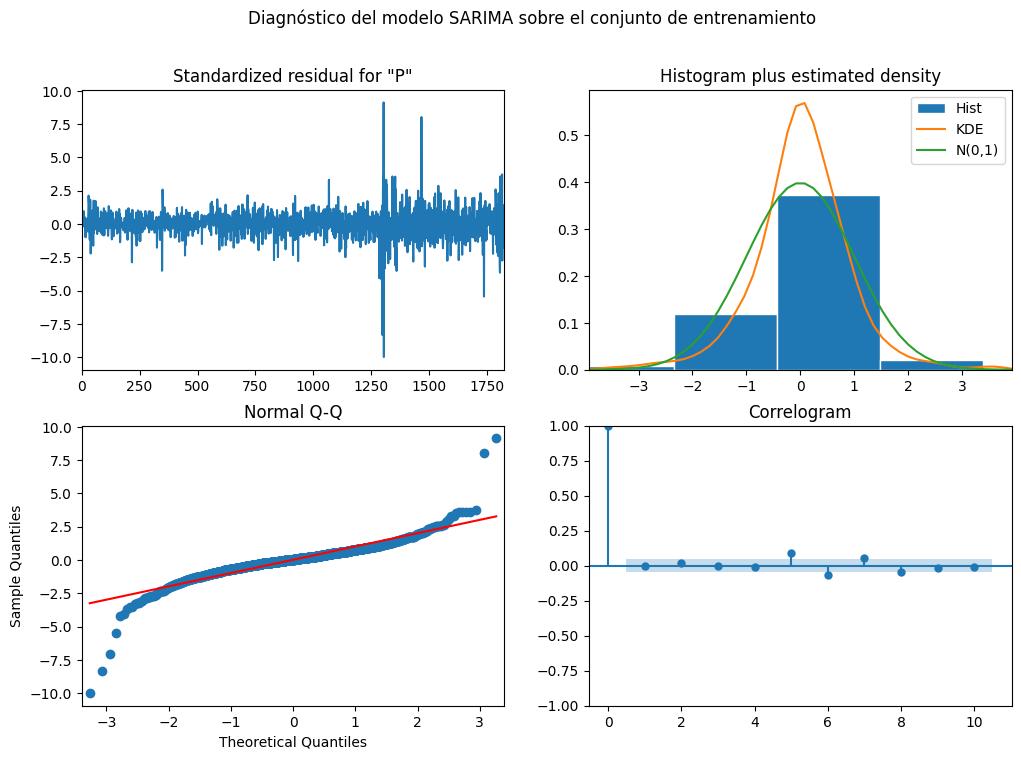

In [35]:
modelo_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle('Diagnóstico del modelo SARIMA sobre el conjunto de entrenamiento')
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


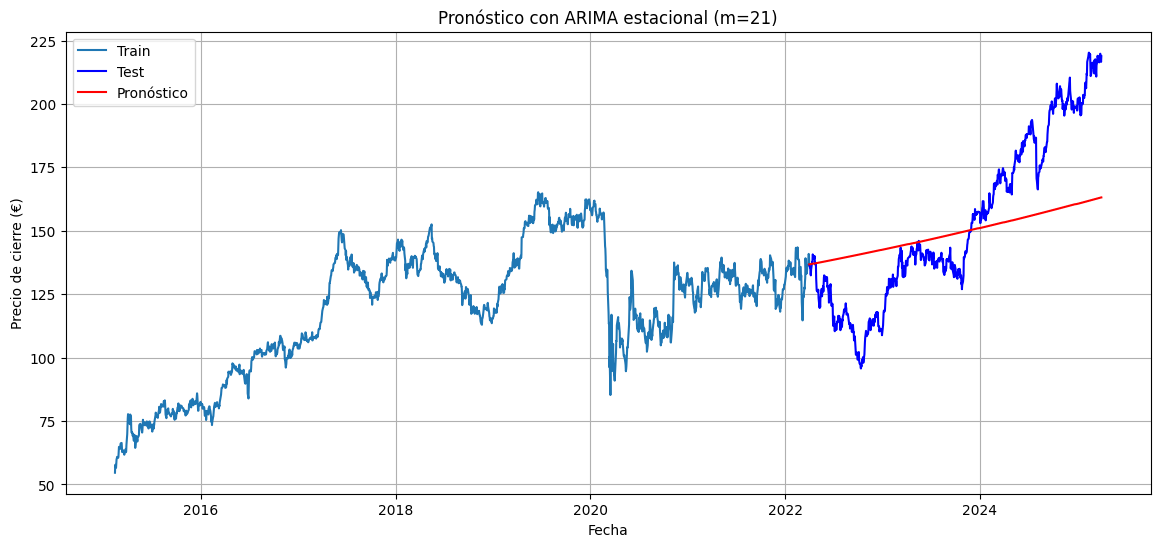

In [36]:
# Forecast para el periodo de test
forecast = modelo_fit.forecast(steps=len(test))
forecast.index = test.index  # muy importante

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Pronóstico con ARIMA estacional (m=21)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (€)')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")


RMSE: 26.2863


MODELO SEGUN GRAFICAS ACF-PACF:

ARIMA(1,1,1)

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo = SARIMAX(train,
                 order=(1, 1, 1),
                 enforce_stationarity=False,
                 enforce_invertibility=False)
modelo_fit = modelo.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


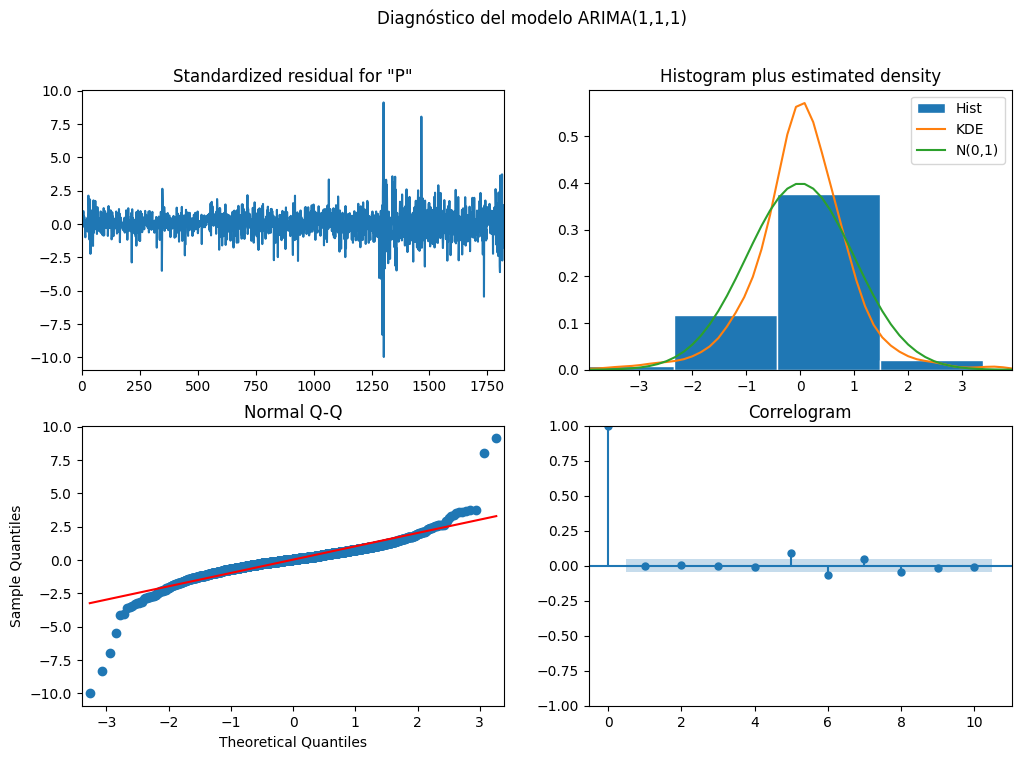

In [19]:
modelo_fit.plot_diagnostics(figsize=(12, 8))
plt.suptitle("Diagnóstico del modelo ARIMA(1,1,1)")
plt.show()

Evaluación de la validez del modelo
1. Residuos estandarizados (gráfico superior izquierdo)
Están centrados en cero y muestran varianza bastante constante en todo el rango.

Hay algunos picos aislados (outliers), pero no hay patrones sistemáticos.

✔️ Aceptable: los residuos no muestran autocorrelación evidente.

2. Histograma + KDE
La curva de densidad (KDE, naranja) es un poco más afilada que la normal (verde).

Esto sugiere ligera leptocurtosis (colas más pesadas), pero la distribución está centrada.

✔️ Adecuado para predicción puntual. La no normalidad solo afecta a intervalos de confianza.

3. Q-Q Plot
Las colas se desvían ligeramente de la línea, especialmente a la izquierda.

Muestra algunos outliers, pero no es grave si no estás generando intervalos de predicción muy precisos.

⚠️ No perfecto, pero aceptable.

4. Correlograma (ACF de residuos)
Todos los lags están dentro del intervalo de confianza (excepto lag 0).

No hay autocorrelación significativa.

✅ Esto es lo más importante: el modelo ha captado la estructura temporal correctamente.

🟢 Conclusión final
Sí, puedes considerar válido este modelo ARIMA(1,1,1).

✅ No hay autocorrelación en los residuos

✅ Residuos centrados y con varianza estable

⚠️ Ligera no normalidad, pero tolerable

Este modelo es adecuado para pronóstico puntual, especialmente si tu objetivo principal es el RMSE o MAE, no los intervalos de confianza.





/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


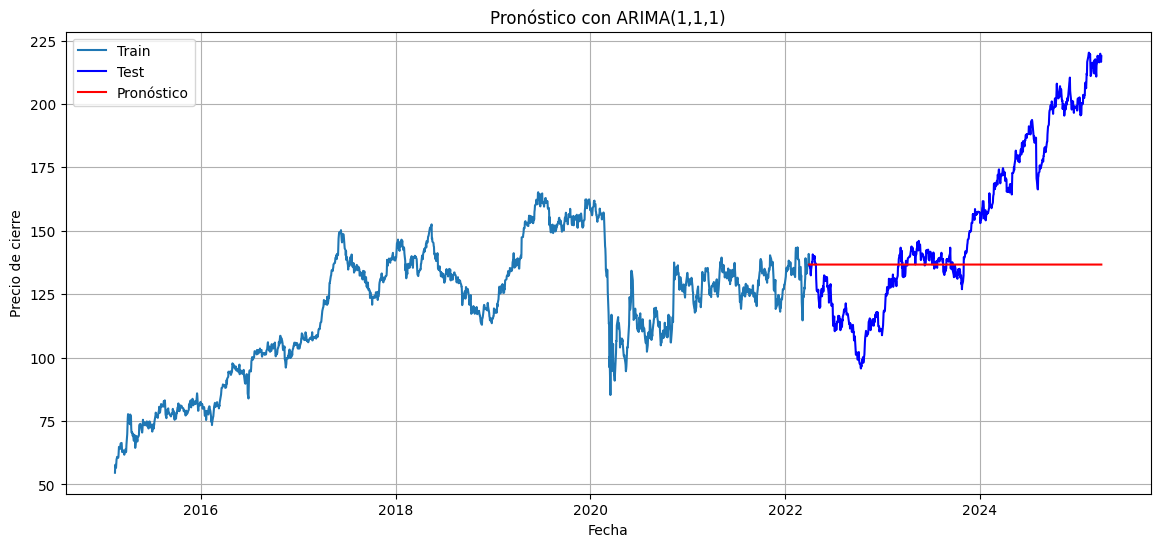

In [20]:
forecast = modelo_fit.forecast(steps=len(test))
forecast.index = test.index  # alineamos las fechas

# 4️Gaficar predicción vs test
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Pronóstico', color='red')
plt.title('Pronóstico con ARIMA(1,1,1)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")

RMSE: 36.9632
